In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install torch torchvision timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

Saving Aedes Aegypti_23.jpg to Aedes Aegypti_23.jpg


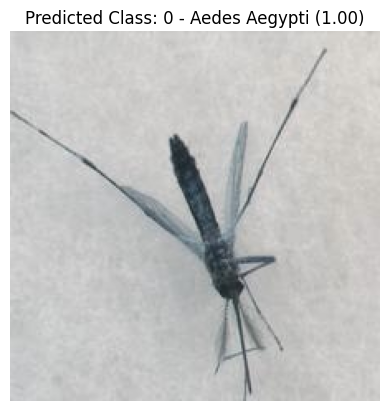

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving 37s.jpg to 37s.jpg


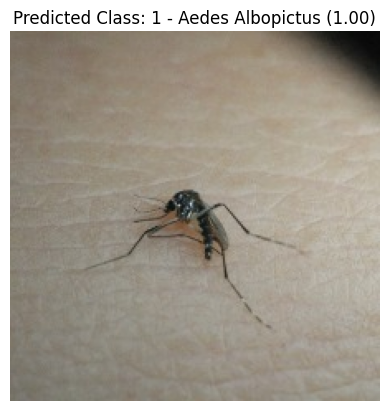

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Albimanus_augmented_25.jpg to Anopheles Albimanus_augmented_25.jpg


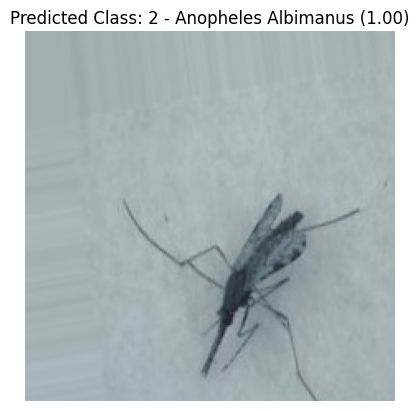

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Arabiensis_augmented_105.jpg to Anopheles Arabiensis_augmented_105.jpg


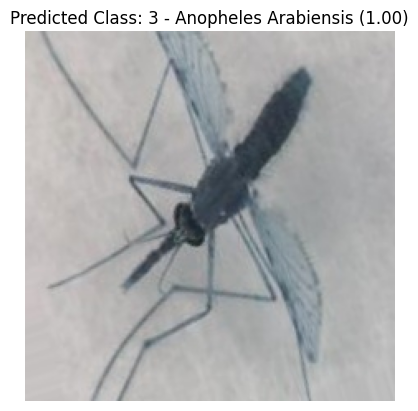

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Atroparvus_augmented_84.jpg to Anopheles Atroparvus_augmented_84.jpg


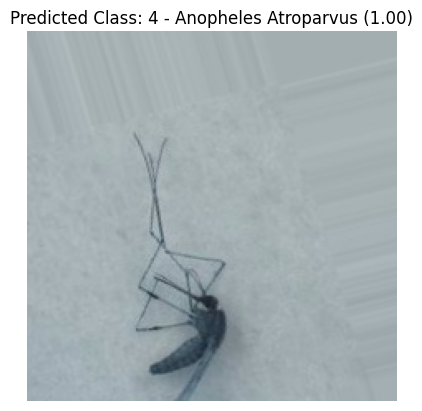

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Coluzzi_augmented_45.jpg to Anopheles Coluzzi_augmented_45.jpg


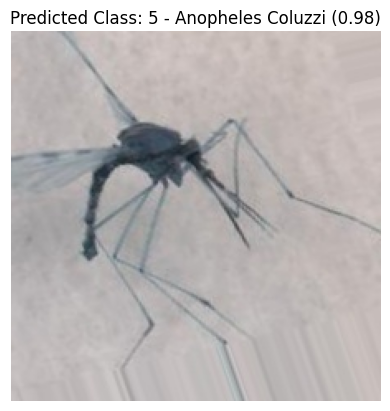

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Farauti_augmented_78.jpg to Anopheles Farauti_augmented_78.jpg


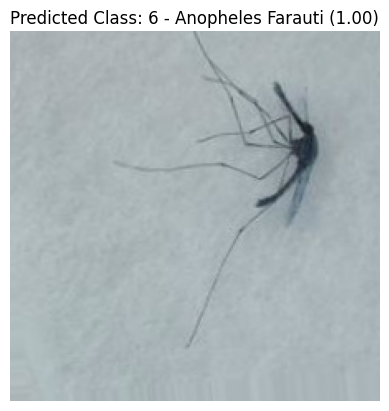

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Freeborni_augmented_2.jpg to Anopheles Freeborni_augmented_2.jpg


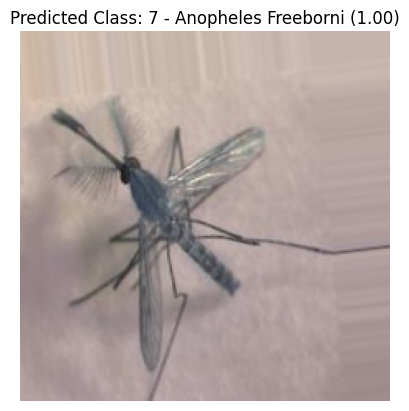

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving Anopheles Stephensi_augmented_36.jpg to Anopheles Stephensi_augmented_36.jpg


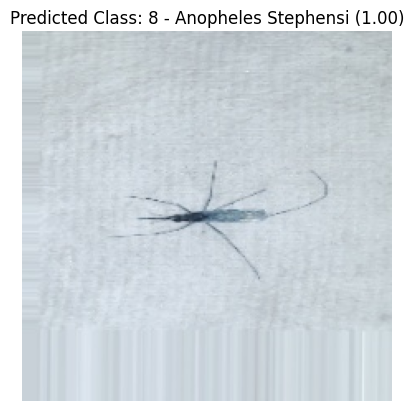

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


Saving 29s.jpg to 29s.jpg


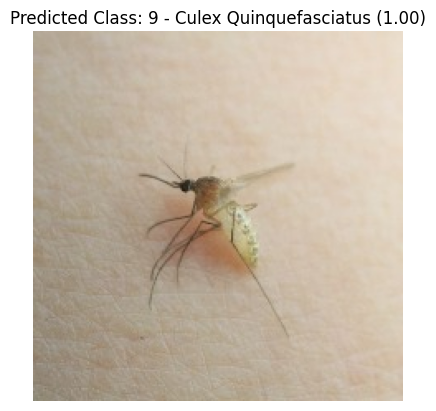

In [ ]:
import shutil
from google.colab import drive
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from timm import create_model

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Swin Transformer Small model
model = create_model('swin_base_patch4_window7_224', num_classes=10, pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth', map_location=device))
model.to(device)
model.eval()

# Define the image dimensions
img_height, img_width = 224, 224

# Define the class names
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus',
               'Anopheles Arabiensis', 'Anopheles Atroparvus', 'Anopheles Coluzzi',
               'Anopheles Farauti', 'Anopheles Freeborni', 'Anopheles Stephensi',
               'Culex Quinquefasciatus']

# Define the prediction function
def predict_image_class(image):
    # Convert image to torch tensor
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_height, img_width)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict class probabilities
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        predicted_prob, predicted_class_idx = torch.max(probabilities, dim=0)
        predicted_class = class_names[predicted_class_idx.item()]

    return predicted_class_idx.item(), predicted_class, predicted_prob.item()

# Handle image upload
uploaded = files.upload()
for fn in uploaded.keys():
    img = Image.open(fn)
    img = np.array(img)

    # Predict image class
    prediction_index, prediction_name, prediction_prob = predict_image_class(img)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {prediction_index} - {prediction_name} ({prediction_prob:.2f})')
    plt.show()


calculated mavs and fitted into weibull distribution.

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances
import pickle
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Correct number of classes based on the model's original training configuration
num_classes = 10  # Make sure this matches your actual number of classes

# Load the Swin Transformer model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=num_classes)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match model expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = ImageFolder(root='/content/drive/MyDrive/datasets/trainset', transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Extract logits and labels from the training data
logits = []
labels = []
with torch.no_grad():
    for images, label in dataloader:
        images = images.to(device)
        outputs = model(images)
        logits.append(outputs.cpu().numpy().flatten())
        labels.append(label.item())

logits = np.array(logits)
labels = np.array(labels)

# Calculate MAVs and distances for each class
mavs = []
distances = []
for i in range(num_classes):
    class_indices = np.where(labels == i)[0]
    class_logits = logits[class_indices]
    mav = np.mean(class_logits, axis=0)
    mavs.append(mav)
    dist = euclidean_distances([mav], class_logits)
    distances.append(dist.flatten())

# Fit Weibull distribution for each class
weibull_models = []
for dist in distances:
    params = weibull_min.fit(dist, floc=0)
    weibull_models.append(params)

# Save the MAVs and Weibull models
with open('swin_s_mavs_and_weibull.pkl', 'wb') as f:
    pickle.dump((mavs, weibull_models), f)

print("MAVs and Weibull models are ready for prediction.")


Using device: cuda
MAVs and Weibull models are ready for prediction.


IndexError: list index out of range

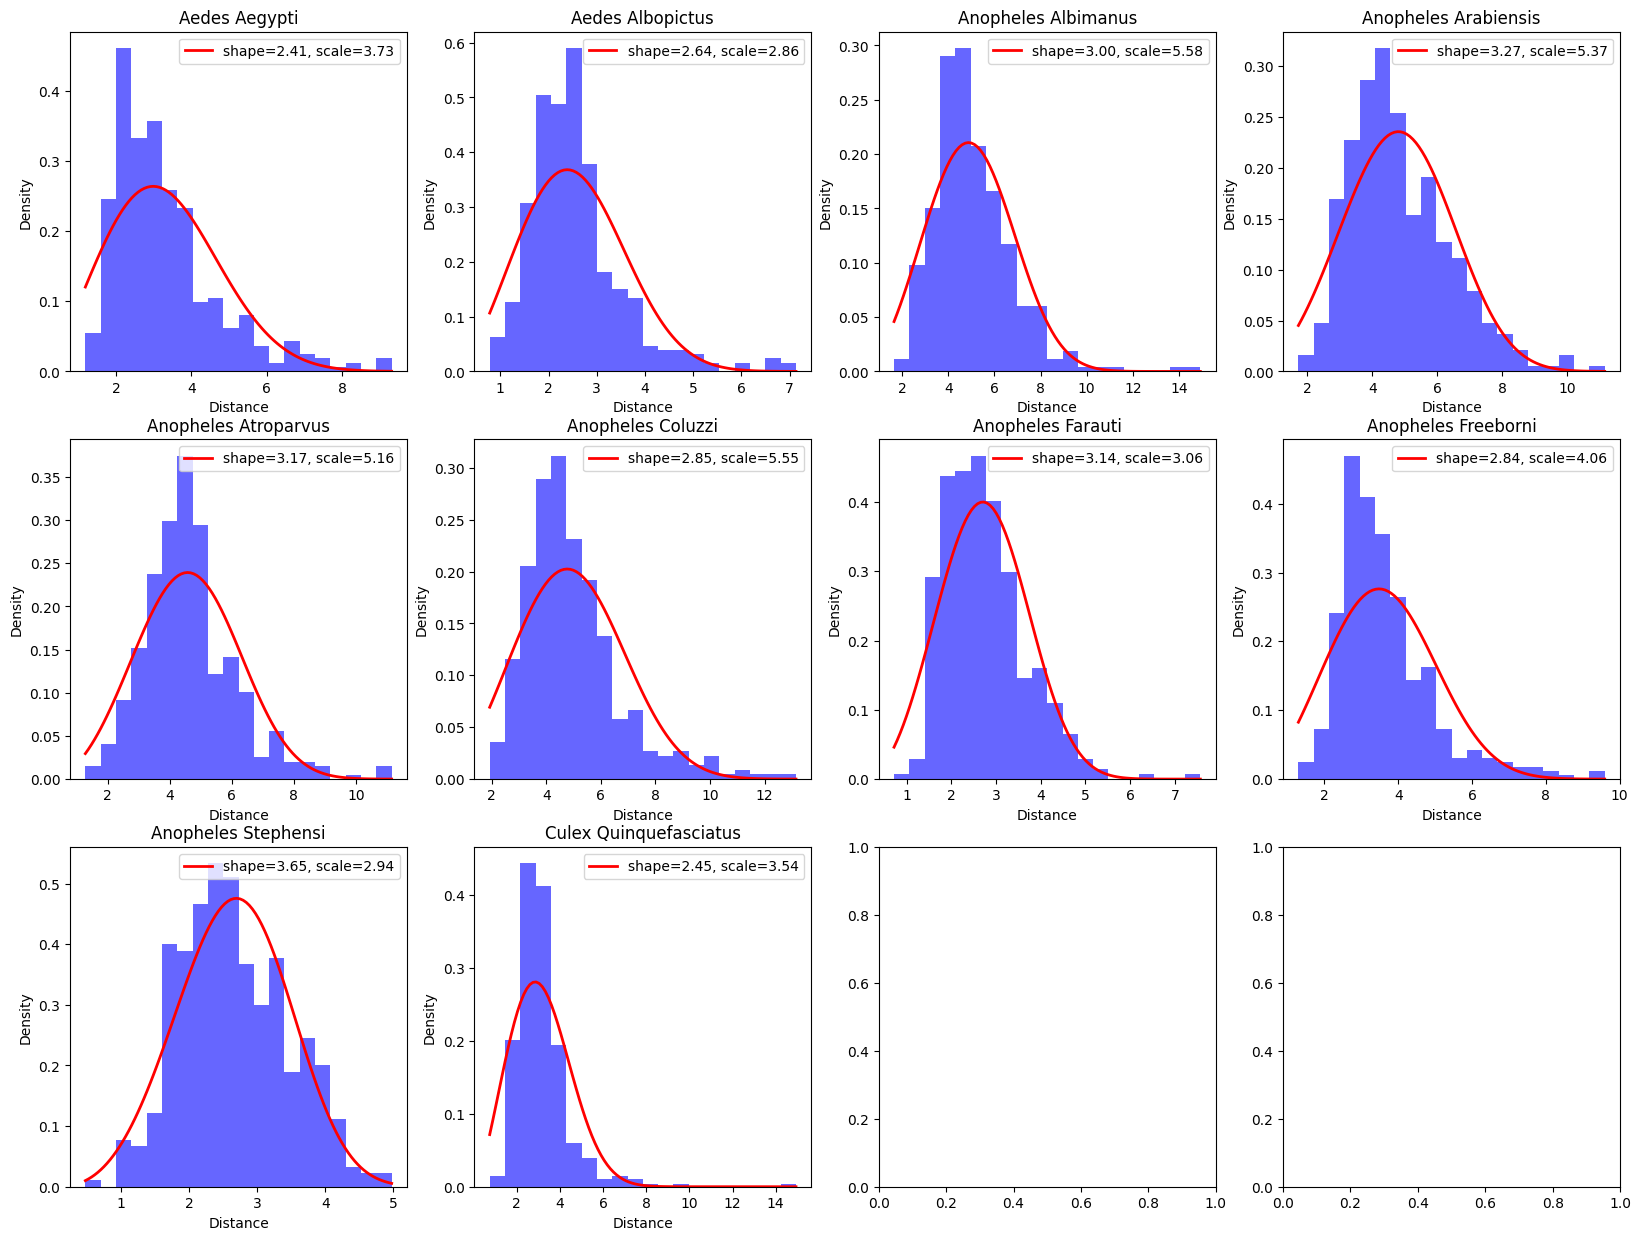

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import weibull_min

# Assuming `distances` and `weibull_models` are already computed as per the previous discussion
# `distances` is a list of arrays, each containing the distances for a class
# `weibull_models` contains the fitted parameters (shape, loc, scale) for each class

class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']  # Ensure class names are defined

# Plot the Weibull distribution fits
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.ravel()

for i in range(len(class_names)):
    ax = axes[i]
    dist = distances[i]
    params = weibull_models[i]
    shape, loc, scale = params

    # Generate Weibull distribution for given parameters
    x = np.linspace(min(dist), max(dist), 100)
    y = weibull_min.pdf(x, shape, loc, scale)

    # Plotting the histogram of distances and the PDF of the fitted Weibull distribution
    ax.hist(dist, bins=20, density=True, alpha=0.6, color='b')
    ax.plot(x, y, 'r-', lw=2, label=f'shape={shape:.2f}, scale={scale:.2f}')
    ax.set_title(class_names[i])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


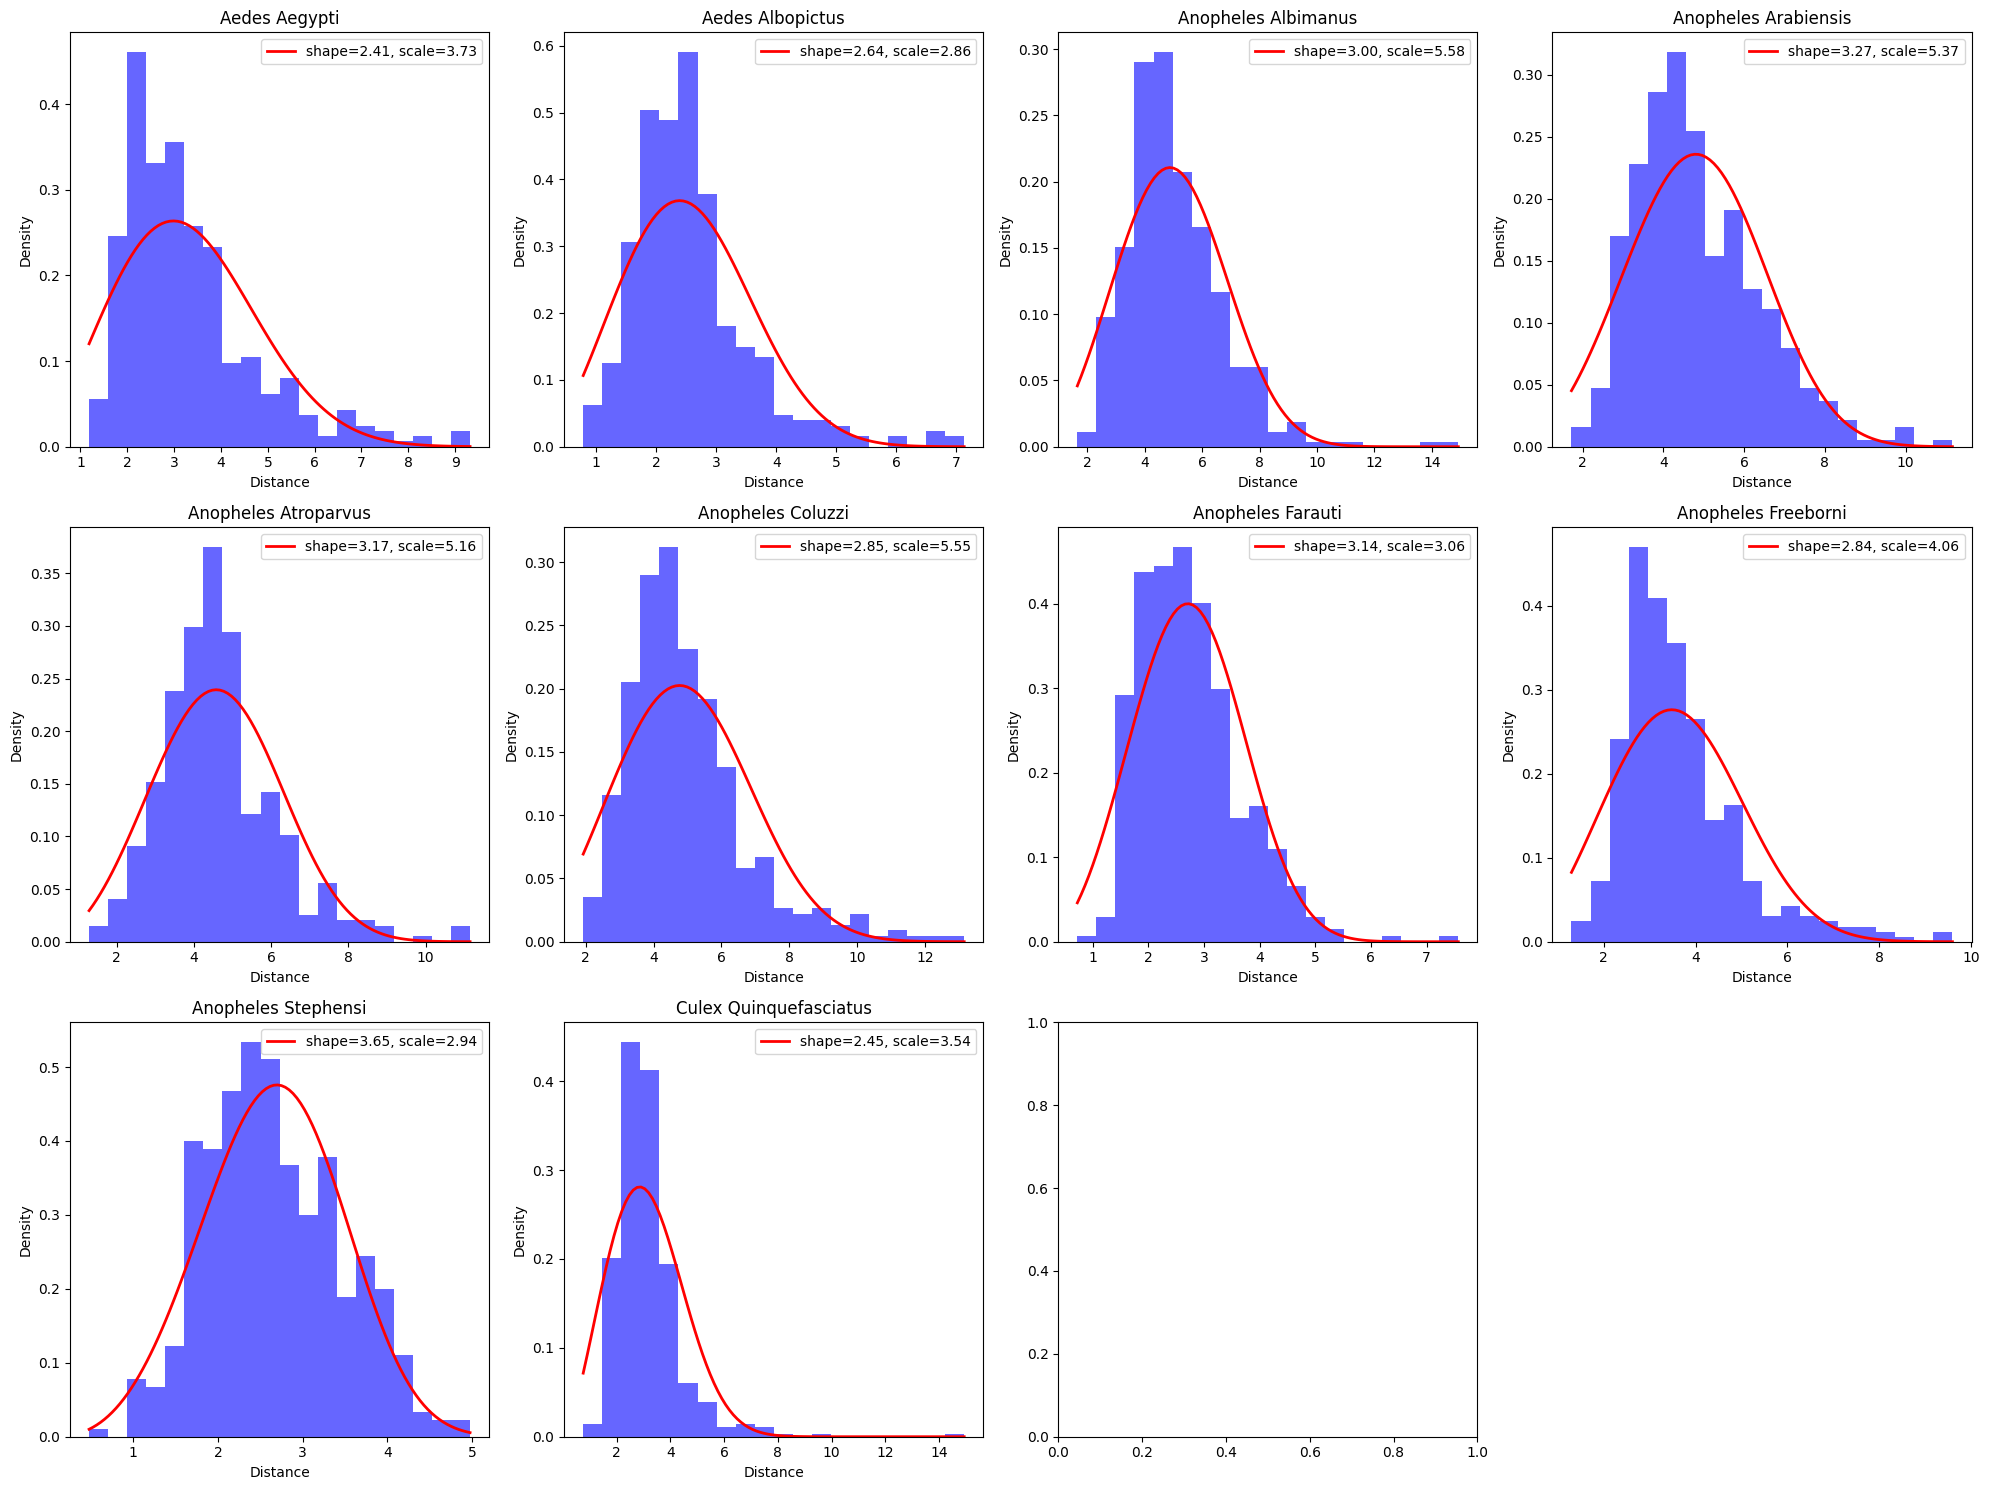

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import weibull_min

# Assuming `distances` and `weibull_models` are already computed as per the previous discussion
# `distances` is a list of arrays, each containing the distances for a class
# `weibull_models` contains the fitted parameters (shape, loc, scale) for each class

class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']  # Ensure class names are defined

# Plot the Weibull distribution fits
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.ravel()

for i in range(len(class_names)):
    if i >= len(distances):  # Make sure we do not exceed the length of distances and weibull_models
        break
    ax = axes[i]
    dist = distances[i]
    params = weibull_models[i]
    shape, loc, scale = params

    # Generate Weibull distribution for given parameters
    x = np.linspace(min(dist), max(dist), 100)
    y = weibull_min.pdf(x, shape, loc, scale)

    # Plotting the histogram of distances and the PDF of the fitted Weibull distribution
    ax.hist(dist, bins=20, density=True, alpha=0.6, color='b')
    ax.plot(x, y, 'r-', lw=2, label=f'shape={shape:.2f}, scale={scale:.2f}')
    ax.set_title(class_names[i])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Density')
    ax.legend()

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


openmax using threshold 0.5

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match model expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load OpenMax parameters
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:  # Ensure correct file name
    mavs, weibull_models = pickle.load(f)

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Classify images using OpenMax
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy().flatten()

        recalibrated_scores = np.zeros(len(mavs))  # Placeholder for recalibrated scores
        threshold = 0.5  # Threshold to decide 'unknown'
        for j in range(len(mavs)):
            dist = euclidean_distances([outputs], [mavs[j]])[0][0]
            shape, loc, scale = weibull_models[j]
            weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
            recalibrated_scores[j] = 1 - weibull_cdf

        if max(recalibrated_scores) < threshold:
            predictions.append(10)  # Index for 'Unknown'
        else:
            predictions.append(np.argmax(recalibrated_scores))

        true_labels.append(labels.item())

# Calculate accuracy and classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Using device: cuda
Accuracy: 0.5418181818181819
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.47      0.64       100
      Aedes Albopictus       1.00      0.49      0.66       100
   Anopheles Albimanus       1.00      0.53      0.69       100
  Anopheles Arabiensis       1.00      0.48      0.65       100
  Anopheles Atroparvus       1.00      0.43      0.60       100
     Anopheles Coluzzi       1.00      0.47      0.64       100
     Anopheles Farauti       1.00      0.49      0.66       100
   Anopheles Freeborni       1.00      0.56      0.72       100
   Anopheles Stephensi       1.00      0.49      0.66       100
Culex Quinquefasciatus       1.00      0.55      0.71       100
               Unknown       0.17      1.00      0.28       100

              accuracy                           0.54      1100
             macro avg       0.92      0.54      0.63      1100
          weighted avg       0

openmax using threshold 0.4

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match model expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load OpenMax parameters
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:  # Ensure correct file name
    mavs, weibull_models = pickle.load(f)

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Classify images using OpenMax
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy().flatten()

        recalibrated_scores = np.zeros(len(mavs))  # Placeholder for recalibrated scores
        threshold = 0.4  # Threshold to decide 'unknown'
        for j in range(len(mavs)):
            dist = euclidean_distances([outputs], [mavs[j]])[0][0]
            shape, loc, scale = weibull_models[j]
            weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
            recalibrated_scores[j] = 1 - weibull_cdf

        if max(recalibrated_scores) < threshold:
            predictions.append(10)  # Index for 'Unknown'
        else:
            predictions.append(np.argmax(recalibrated_scores))

        true_labels.append(labels.item())

# Calculate accuracy and classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Using device: cuda
Accuracy: 0.6472727272727272
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.61      0.76       100
      Aedes Albopictus       1.00      0.58      0.73       100
   Anopheles Albimanus       1.00      0.65      0.79       100
  Anopheles Arabiensis       1.00      0.53      0.69       100
  Anopheles Atroparvus       1.00      0.52      0.68       100
     Anopheles Coluzzi       1.00      0.60      0.75       100
     Anopheles Farauti       1.00      0.60      0.75       100
   Anopheles Freeborni       1.00      0.64      0.78       100
   Anopheles Stephensi       1.00      0.63      0.77       100
Culex Quinquefasciatus       1.00      0.76      0.86       100
               Unknown       0.20      1.00      0.34       100

              accuracy                           0.65      1100
             macro avg       0.93      0.65      0.72      1100
          weighted avg       0

openmax using threshold 0.3

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match model expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load OpenMax parameters
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:  # Ensure correct file name
    mavs, weibull_models = pickle.load(f)

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Classify images using OpenMax
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy().flatten()

        recalibrated_scores = np.zeros(len(mavs))  # Placeholder for recalibrated scores
        threshold = 0.3  # Threshold to decide 'unknown'
        for j in range(len(mavs)):
            dist = euclidean_distances([outputs], [mavs[j]])[0][0]
            shape, loc, scale = weibull_models[j]
            weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
            recalibrated_scores[j] = 1 - weibull_cdf

        if max(recalibrated_scores) < threshold:
            predictions.append(10)  # Index for 'Unknown'
        else:
            predictions.append(np.argmax(recalibrated_scores))

        true_labels.append(labels.item())

# Calculate accuracy and classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Using device: cuda
Accuracy: 0.73
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.64      0.78       100
      Aedes Albopictus       1.00      0.71      0.83       100
   Anopheles Albimanus       1.00      0.73      0.84       100
  Anopheles Arabiensis       1.00      0.64      0.78       100
  Anopheles Atroparvus       1.00      0.63      0.77       100
     Anopheles Coluzzi       1.00      0.67      0.80       100
     Anopheles Farauti       1.00      0.69      0.82       100
   Anopheles Freeborni       1.00      0.74      0.85       100
   Anopheles Stephensi       1.00      0.71      0.83       100
Culex Quinquefasciatus       1.00      0.87      0.93       100
               Unknown       0.25      1.00      0.40       100

              accuracy                           0.73      1100
             macro avg       0.93      0.73      0.79      1100
          weighted avg       0.93      0.73 

openmax using threshold 0.2

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match model expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load OpenMax parameters
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:  # Ensure correct file name
    mavs, weibull_models = pickle.load(f)

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Classify images using OpenMax
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy().flatten()

        recalibrated_scores = np.zeros(len(mavs))  # Placeholder for recalibrated scores
        threshold = 0.2  # Threshold to decide 'unknown'
        for j in range(len(mavs)):
            dist = euclidean_distances([outputs], [mavs[j]])[0][0]
            shape, loc, scale = weibull_models[j]
            weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
            recalibrated_scores[j] = 1 - weibull_cdf

        if max(recalibrated_scores) < threshold:
            predictions.append(10)  # Index for 'Unknown'
        else:
            predictions.append(np.argmax(recalibrated_scores))

        true_labels.append(labels.item())

# Calculate accuracy and classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Using device: cuda
Accuracy: 0.8145454545454546
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.75      0.86       100
      Aedes Albopictus       1.00      0.78      0.88       100
   Anopheles Albimanus       1.00      0.79      0.88       100
  Anopheles Arabiensis       1.00      0.75      0.86       100
  Anopheles Atroparvus       1.00      0.81      0.90       100
     Anopheles Coluzzi       1.00      0.75      0.86       100
     Anopheles Farauti       1.00      0.78      0.88       100
   Anopheles Freeborni       1.00      0.83      0.91       100
   Anopheles Stephensi       1.00      0.80      0.89       100
Culex Quinquefasciatus       1.00      0.92      0.96       100
               Unknown       0.33      1.00      0.50       100

              accuracy                           0.81      1100
             macro avg       0.94      0.81      0.85      1100
          weighted avg       0

openmax using threshold 0.1

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, accuracy_score, classification_report
import pickle
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match model expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load OpenMax parameters
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:  # Ensure correct file name
    mavs, weibull_models = pickle.load(f)

# Define class names including 'Unknown'
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']

# Classify images using OpenMax
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy().flatten()

        recalibrated_scores = np.zeros(len(mavs))  # Placeholder for recalibrated scores
        threshold = 0.1  # Threshold to decide 'unknown'
        for j in range(len(mavs)):
            dist = euclidean_distances([outputs], [mavs[j]])[0][0]
            shape, loc, scale = weibull_models[j]
            weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
            recalibrated_scores[j] = 1 - weibull_cdf

        if max(recalibrated_scores) < threshold:
            predictions.append(10)  # Index for 'Unknown'
        else:
            predictions.append(np.argmax(recalibrated_scores))

        true_labels.append(labels.item())

# Calculate accuracy and classification report
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Using device: cuda
Accuracy: 0.8845454545454545
Classification Report:
                         precision    recall  f1-score   support

         Aedes Aegypti       1.00      0.85      0.92       100
      Aedes Albopictus       1.00      0.87      0.93       100
   Anopheles Albimanus       1.00      0.88      0.94       100
  Anopheles Arabiensis       1.00      0.83      0.91       100
  Anopheles Atroparvus       1.00      0.90      0.95       100
     Anopheles Coluzzi       1.00      0.77      0.87       100
     Anopheles Farauti       1.00      0.84      0.91       100
   Anopheles Freeborni       1.00      0.91      0.95       100
   Anopheles Stephensi       1.00      0.93      0.96       100
Culex Quinquefasciatus       1.00      0.95      0.97       100
               Unknown       0.44      1.00      0.61       100

              accuracy                           0.88      1100
             macro avg       0.95      0.88      0.90      1100
          weighted avg       0

Using device: cuda


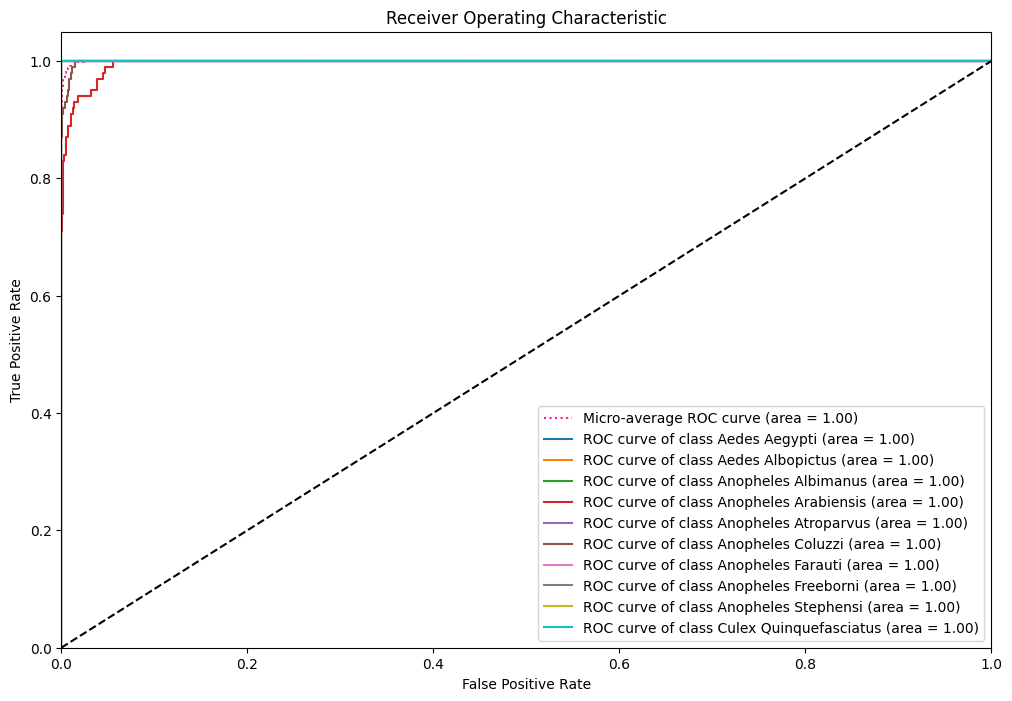

AUROC per class:
Aedes Aegypti: 1.00
Aedes Albopictus: 1.00
Anopheles Albimanus: 1.00
Anopheles Arabiensis: 1.00
Anopheles Atroparvus: 1.00
Anopheles Coluzzi: 1.00
Anopheles Farauti: 1.00
Anopheles Freeborni: 1.00
Anopheles Stephensi: 1.00
Culex Quinquefasciatus: 1.00
Micro-average AUROC: 0.9996756


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import timm

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Prepare label binarizer
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus']
n_classes = len(class_names)

# Collect all scores and true labels
true_labels = []
scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy()
        scores.extend(outputs)
        true_labels.extend(labels.numpy())

# Binarize the labels for ROC calculation
true_labels = label_binarize(true_labels, classes=range(n_classes))
scores = np.array(scores)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotting ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUROC scores
print("AUROC per class:")
for i, name in enumerate(class_names):
    print(f"{name}: {roc_auc[i]:.2f}")
print("Micro-average AUROC:", roc_auc["micro"])


Using device: cuda


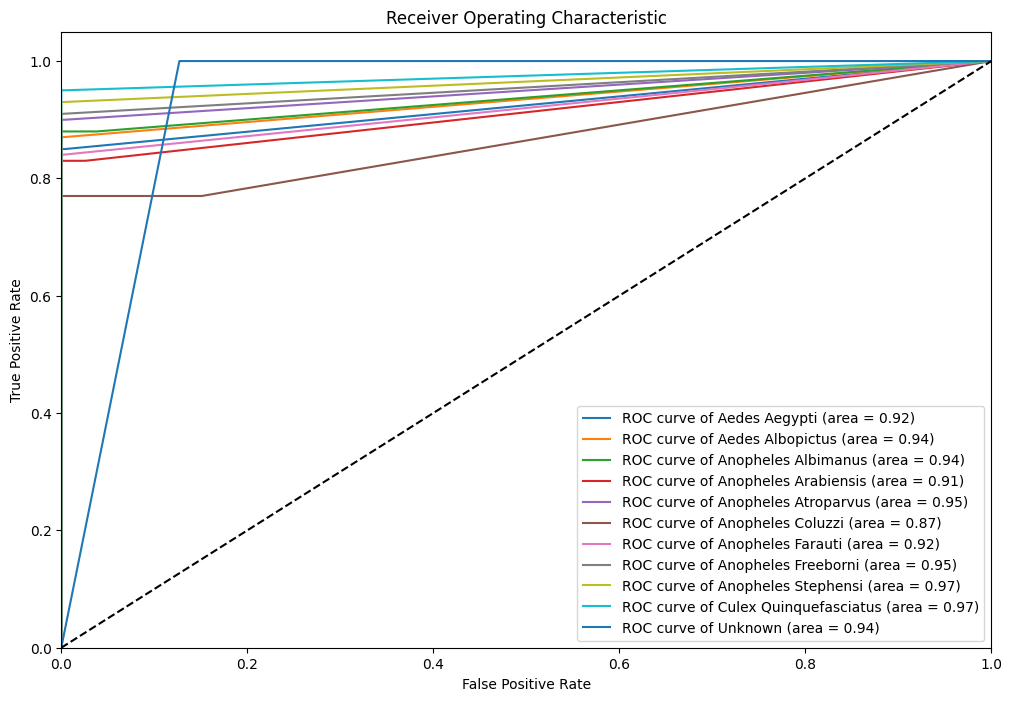

AUROC per class:
Aedes Aegypti: 0.92
Aedes Albopictus: 0.94
Anopheles Albimanus: 0.94
Anopheles Arabiensis: 0.91
Anopheles Atroparvus: 0.95
Anopheles Coluzzi: 0.87
Anopheles Farauti: 0.92
Anopheles Freeborni: 0.95
Anopheles Stephensi: 0.97
Culex Quinquefasciatus: 0.97
Unknown: 0.94


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pickle
import timm

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test data using ImageFolder
test_dataset = ImageFolder(root='/content/drive/MyDrive/datasets/openmaxTestset', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load OpenMax parameters
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:  # Updated file name for Swin-S model
    mavs, weibull_models = pickle.load(f)

# Prepare for ROC
class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus', 'Unknown']
n_classes = len(class_names) - 1  # excluding the 'Unknown' for initial setup

true_labels = []
scores = []

# Adjust logits using OpenMax
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        logits = model(images).cpu().numpy()
        adjusted_scores = np.zeros((logits.shape[0], n_classes + 1))  # +1 for unknown

        for i, logit in enumerate(logits):
            recalibrated_scores = np.zeros(n_classes)
            for j in range(n_classes):
                dist = euclidean_distances([logit], [mavs[j]])[0][0]
                shape, loc, scale = weibull_models[j]
                weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
                recalibrated_scores[j] = 1 - weibull_cdf

            if max(recalibrated_scores) < 0.1:  # Threshold for 'Unknown'
                adjusted_scores[i, -1] = 1  # Set last class (Unknown) score to 1
            else:
                adjusted_scores[i, :-1] = recalibrated_scores

            scores.append(adjusted_scores[i])
            true_labels.append(labels.numpy()[i])

scores = np.array(scores)
true_labels = label_binarize(true_labels, classes=range(n_classes + 1))

# Compute ROC and AUROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes + 1):  # Including 'Unknown'
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(12, 8))
for i in range(n_classes + 1):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUROC
print("AUROC per class:")
for i in range(n_classes + 1):
    print(f"{class_names[i]}: {roc_auc[i]:.2f}")


Using device: cuda


FileUpload(value={}, accept='image/*', description='Upload')

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


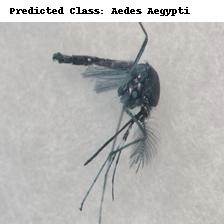

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


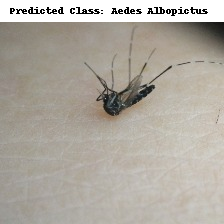

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


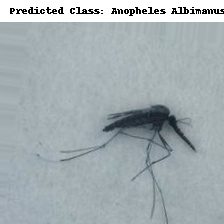

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


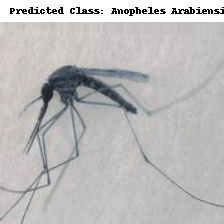

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


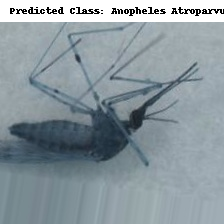

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


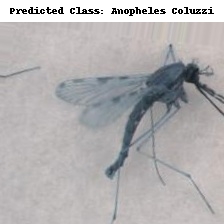

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


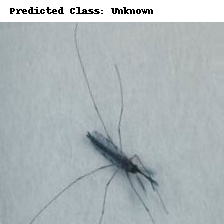

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


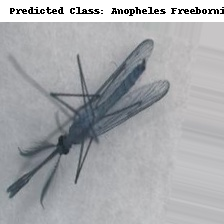

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


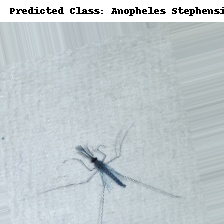

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


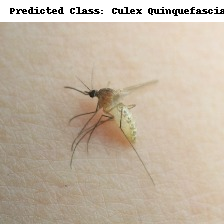

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


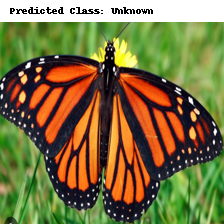

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


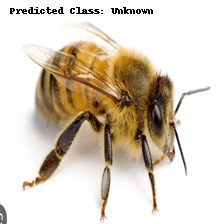

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


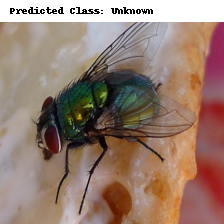

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


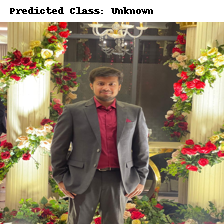

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


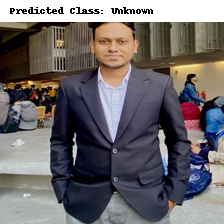

<ipython-input-25-62c1e348ac7f>:65: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


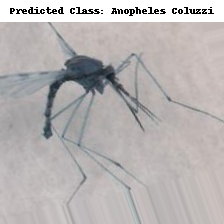

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
from scipy.stats import weibull_min
from sklearn.metrics import euclidean_distances
import pickle
import timm
from PIL import Image, ImageDraw, ImageFont
import ipywidgets as widgets
from IPython.display import display

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

# Load the Swin Transformer Small model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=10)
model_path = '/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_model.pth'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Load MAVs and Weibull models
with open('/content/drive/MyDrive/mosquito_model6(Swin-B)/swin_b_mavs_and_weibull.pkl', 'rb') as f:
    mavs, weibull_models = pickle.load(f)

class_names = ['Aedes Aegypti', 'Aedes Albopictus', 'Anopheles Albimanus', 'Anopheles Arabiensis',
               'Anopheles Atroparvus', 'Anopheles Coluzzi', 'Anopheles Farauti', 'Anopheles Freeborni',
               'Anopheles Stephensi', 'Culex Quinquefasciatus']
num_classes = len(class_names)

def classify_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(img_tensor).cpu().numpy().flatten()

    # Calculate distances from MAVs and apply Weibull CDF
    recalibrated_scores = np.zeros(num_classes)
    for i in range(num_classes):
        dist = euclidean_distances([logits], [mavs[i]])[0][0]
        shape, loc, scale = weibull_models[i]
        weibull_cdf = weibull_min.cdf(dist, shape, loc, scale)
        recalibrated_scores[i] = 1 - weibull_cdf

    # Apply threshold to determine if the image is unknown or one of the known classes
    threshold = 0.1
    predicted_class_index = np.argmax(recalibrated_scores)
    predicted_class = "Unknown" if recalibrated_scores[predicted_class_index] < threshold else class_names[predicted_class_index]

    # Draw predicted class on the image
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()
    text = f'Predicted Class: {predicted_class}'
    text_width, text_height = draw.textsize(text, font=font)
    img_width, img_height = img.size
    draw.rectangle([(0, 0), (img_width, text_height + 10)], fill='white')
    draw.text((10, 5), text, fill='black', font=font)

    # Display the image with the predicted class overlaid
    display(img)

# Widget to upload an image
uploader = widgets.FileUpload(
    accept='image/*',  # Accept only images
    multiple=False  # Allow single file upload
)

def on_upload_change(change):
    if not uploader.value:
        return
    for _, file_info in uploader.value.items():
        content = file_info['content']
        with open("uploaded_image.png", "wb") as f:
            f.write(content)
        classify_image("uploaded_image.png")

uploader.observe(on_upload_change, names='value')
display(uploader)
